## Faster than Relaxation

### Overrelaxation

The relaxation method converges to the true solution surely, but very slowly. One way to rectify this is to allow the relaxation method to **overshoot**. Given the initial guess or old value $\phi(x,y)$ and the updated new values $\phi^\prime(x,y)$, we can calculate over-relaxed values as:
$$ \phi_w(x,y) = \frac{1+w}{4} [\phi(x+a,y) +  \phi(x-a,y) + \phi(x,y+a) + \phi(x,y-a)] - w\phi(x,y) $$
where $w>0$.  
**Beware** -- this method may not always be numerically stable. The choice of $w$ is best determined by trial and error. In general, $w<1$ leads to a stable outcome, while too large values of $w$ (which may intuitively seem to speed things up) may not allow the solution to converge.

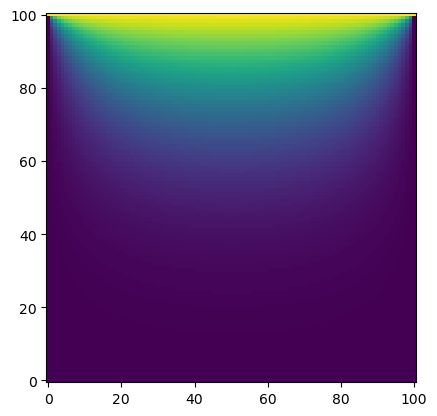

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# constants
N   = 100   # number of divisions along one side of the square
V   = 1.0   # fixed potential at one end
tol = 1e-4  # target accuracy
w   = 1e-3  # overrelaxation parameter

# create an (N+1)x(N+1) array to hold values of potential
phi = np.zeros((N+1,N+1),float)     # initial values
phip = np.zeros((N+1,N+1),float)    # updated values

phi[N,:]  = V  # saving the boundary value
phip[N,:] = V  # saving the boundary value

delta = np.inf
while delta>tol:
    for i in range(1,N):
        for j in range(1,N):
            phip[i,j] = 0.25*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])     # modify for the overrelaxation parameter
    delta = np.max(abs(phip-phi))    # absolute difference between old and new values
    phi, phip = phip, phi            # update the old array with new values

plt.imshow(phi,origin='lower')

## Gauss-Siedel Method

Rewriting old values with new values as soon as they are calculated. It uses less memory since the same array is updated, and it is numerically stable.

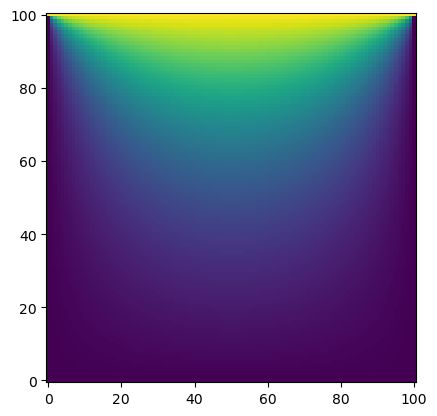

In [2]:
target = 1e-6   # Target accuracy
N = 100
w = 1e-3#0.9

# Create arrays to hold potential values
phi = np.zeros([N+1,N+1],float)
phi[N,:] = V

# Main loop
delta = np.inf
w     = 0.00001
while delta>target:
    delta = 0
    # Calculate new values of the potential
    for i in range(1,N):
        for j in range(1,N):
            difference = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - phi[i,j]
            phi[i,j]  = (1+w)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4  # (1+w)*difference
            if difference>delta: 
                delta = difference
# Make a plot
plt.imshow(phi,origin='lower')

## FTCS Method

Creating a "space-time" grid does not work for initial value problems -- typically, we have boundary conditions in spatial dimension(s) and initial condition at a given time, and not the value at some later time.  
Consider the heat equation (or general diffusion equation):
$$ \frac{\partial \phi}{\partial t} = D \frac{\partial^2\phi}{\partial x^2} $$
Here $D$ is the diffusion coefficient. 
* We can divide the spatial dimensions into a grid of points, with fixed spacing $a$.
$$ \frac{\partial^2\phi}{\partial x^2} = \frac{\phi(x+a,t) - 2\phi(x,t) +\phi(x-a,t)}{a^2} $$
This gives us an ODE with 1 independent variable:
$$ \frac{\partial \phi}{\partial t} = \frac{D}{a^2}[\phi(x+a,t) - 2\phi(x,t) +\phi(x-a,t)] $$
We can then use Euler's method to calculate the final value.  
**Note:** RK4 is an overkill here since the double derivative is already an approximation. We trade efficiency for accuracy!
$$ \phi(x,t+h) = \phi(x,t) + h\frac{D}{a^2}[\phi(x+a,t) - 2\phi(x,t) +\phi(x-a,t)] $$
This is the forward-time centered-space method -- if we know the value of $\phi$ at every grid point at some time $t$, then this equation tells us the value at every grid point at $t+h$, a short interval later.

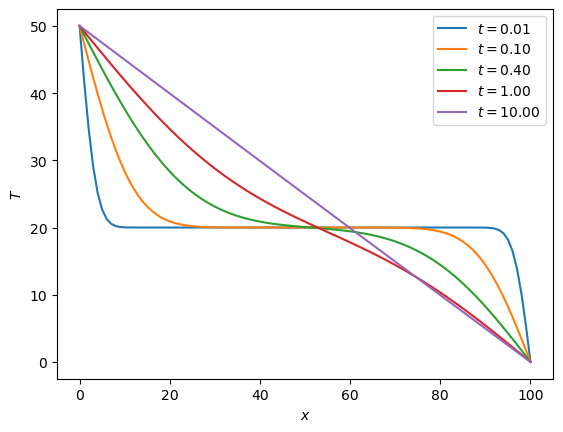

In [3]:
# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

# times when we wish to plot the temperature profile
t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = np.empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = np.empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:
    # Calculate the new values of T
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    #Tp[1:N] = T[1:N] + c*(T[2:N+1]+T[0:N-1]-2*T[1:N])
    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t1))
    if abs(t-t2)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t2))
    if abs(t-t3)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t3))
    if abs(t-t4)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t4))
    if abs(t-t5)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t5))

plt.xlabel(r"$x$")
plt.ylabel(r"$T$")
#plt.plot([0,100],[50,0],'k--')
plt.legend()
plt.show()

# Try it yourself

### Total 4 marks

Assume that the hot water cools at a rate of 1 $^\circ$C/min, and the cold water heats at the same rate. Incorporate changing boundary temperatures in the above code and plot the final temperature profile.

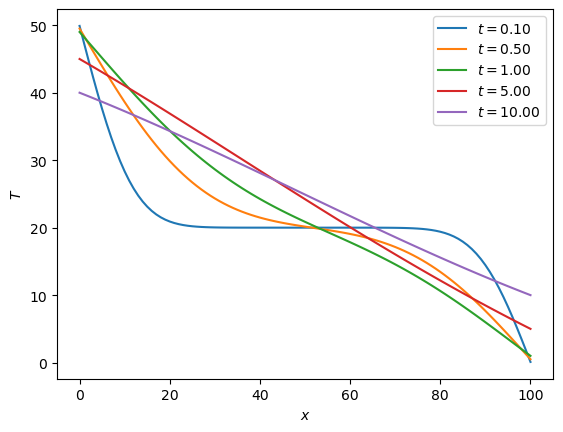

In [4]:
# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000
R = 1         # degrees Celcius/seconds, constant heating and cooling rate (1 degree C per min is too small)

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

# times when we wish to plot the temperature profile
t1 = 0.1
t2 = 0.5
t3 = 1
t4 = 5
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = np.empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = np.empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:
    # Calculate the new values of T
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    
    T,Tp = Tp,T
    t += h
    T[0] -= R*h
    T[N] += R*h
    Tp[0] -= R*h
    Tp[N] += R*h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t1))
    if abs(t-t2)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t2))
    if abs(t-t3)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t3))
    if abs(t-t4)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t4))
    if abs(t-t5)<epsilon:
        plt.plot(T,label=r'$t={:.2f}$'.format(t5))

plt.xlabel(r"$x$")
plt.ylabel(r"$T$")
plt.legend()
plt.show()